# The Winning Formula: What Makes a Game a Hit?


<div class="alert alert-block alert-info">
<b>
    
- Entrego este proyecto completamente en inglés para incrementar su valor curricular en mi portafolio.
  
    </b> <a class="tocSkip"></a>
</div>




In this project, we will analize data from the online videogame store Ice. We want to identify patterns that determine whether a game is successful or not, and use this knowledge to plan effective marketing campaigns for promising projects.

## 1. Introduction
The raw data is in the file `/datasets/games.csv` and contains records of up to 2016. We will build forecasts for 2017.

#### Data description
The data comes with the following fields (columns):

— Name

— Platform

— Year_of_Release

— Genre

— NA_sales (North America sales in millions of USD) 

— EU_sales (Europe sales in millions of USD) 

— JP_sales (Japan sales in millions of USD) 

— Other_sales (other countries sales in millions of USD) 

— Critic_Score (maximum of 100) 

— User_Score (maximum of 10) 

— Rating (ESRB)

The `Rating` column contains the rating given by the Entertainment Software Rating Board, which evaluates the game content and assigns it an age classification, such as Teen or Adult.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the data from file
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Show a sample of the data
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11612,New International Track & Field,DS,2008.0,Sports,0.07,0.00,0.00,0.01,NaN,NaN,NaN
1775,WWE 2K15,PS4,2014.0,Sports,0.39,0.57,0.00,0.19,62.0,5.1,T
3735,Petz Nursery,DS,2009.0,Simulation,0.50,0.00,0.00,0.04,NaN,tbd,E
1660,Dino Crisis 2,PS,2000.0,Action,0.34,0.49,0.28,0.10,86.0,9,M
7012,Jewels of the Tropical Lost Island,DS,2010.0,Puzzle,0.11,0.10,0.00,0.02,NaN,tbd,E


## 2.1 Data preparation and standarization

In [4]:
# Show the dataframe info
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Show the list of values from relevant columns
print('Platforms:', sorted(games['Platform'].unique()),', ', games['Platform'].nunique(), '\n')
print('Years:', sorted(games['Year_of_Release'].unique()),'\n')
print('Genres:', games['Genre'].unique(),'\n')
print('Ratings:', games['Rating'].unique(),'\n')
print('Critic Scores:', sorted(games['Critic_Score'].unique()),'\n')
print('User Scores:', games['User_Score'].unique(),'\n')

Platforms: ['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'] ,  31 

Years: [1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan] 

Genres: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 

Ratings: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP'] 

Critic Scores: [76.0, nan, 13.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 

We observe that the dataset comprises games from every year **between 1980 and 2016**, from **31 different platforms**, **12 different genres** and **8 different ratings**. We also notice that **none** of the `Sales` or the `Platform` columns have empty values.

### Standarization
For convenience and good practice we convert the column names to lower case.

In [6]:
games.columns = games.columns.str.lower()

#### Type conversion
The `year_of_release` has only integers (besides null values), hence we can convert it to type `Int64`, which accepts nan values.

In [7]:
# Convert columns type to integers
games['year_of_release'] = games['year_of_release'].astype('Int64')

We could do the same for the `critic_score`, but we will find it more useful to keep it as a `float` for later calculations.

`user_score`, however, cannot be directly converted to a numeric type, as it also includes the string 'tbd'. 

'tbd' is a common English abbreviation of "to be determined". Hence, we just know that they're a kind of empty value.
We could try to investigate what the difference is between a value registered as tbd and a non-registered value (NaN), and we would most likely find something related to the data recollection process.
However in this occasion, we won't dig further, and will just regard all `'tbd's` as empty values (nan) and convert the column type to numeric (float).


In [8]:
#Convert column to numeric type, and strings ('tbd') to nan
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

#Show updated info
print(games['user_score'].unique())
games.info()

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   fl

## 2.2 Data Cleaning & Preparation


### Adding total sales

First, in order to simplify and make more informative initial explorations, let's add a column with the total sales for each game.

In [9]:
# Compute the total sales and add it as new column
games['total_sales'] = (games['na_sales'] 
                        + games['eu_sales']
                        + games['jp_sales']
                        + games['other_sales'])

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Now, let's identify the issues with the current data set by identifying duplicates and empty values. 

### Empty value identification

#### Missing name (and genre)

In [10]:
# Show games with empty name
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


There are only **2 games without `name`**. 
Notice, these are also the only 2 games **without a `genre`**.

Furthermore, as we will see later, we won't concern ourselves much with data from 1999 or earlier. Hence, we are good to ignore/delete these missing games. 

In [11]:
# Clear entries with missing name
games.dropna(subset=['name'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


#### Missing year of release

In [12]:
# Show games with empty year_of_release
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [13]:
269/len(games)

0.016095255190570215

269 Missing year of release values (**1.6% of the data**)

Some of the games have a year in the title. This could be used to quickly obtain the year of release. However, some games (like FIFA) are released a year before, and the formatting varies...

Let's check what percentage of the total sales they represent to decide if we should neglect them.

In [14]:
tsna = games[games['year_of_release'].isnull()]['total_sales'].sum()
ts = games['total_sales'].sum()

print(f'year_of_release is null total_sales: {tsna:.2f} million USD')
print(f"Represents a {tsna/ts*100:.2f}% of the")
print('Total sales overall:', ts, "million USD")

year_of_release is null total_sales: 98.92 million USD
Represents a 1.11% of the
Total sales overall: 8913.29 million USD


This is even smaller than the 1.6% found for quantity of games. Hence we will **neglect these games**.

In [15]:
games.dropna(subset={'year_of_release'}, inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


#### Missing `critic_score`, `user_score` and `rating`


In [16]:
# Show the number of missing values per column
empty_counts = games.isnull().sum()[['critic_score', 'user_score', 'rating']]
empty_counts

critic_score    8461
user_score      8981
rating          6676
dtype: int64

In [17]:
# Show the percentage of missing values per column
for column, value in empty_counts.items():
    print(f'Missing {column} values on {value/len(games)*100:.2f}% of the data.')

Missing critic_score values on 51.45% of the data.
Missing user_score values on 54.62% of the data.
Missing rating values on 40.60% of the data.


These 3 columns show very significant missing portions of the data.
Hence, we cannot neglect them.

We will **take care of this later**, when it's relevant.


### Duplicate identification

As several versions of the same game can be released for different platforms, we should only be concerned if we find entries with the `name`, `platform`, and `year_of_release` all duplicated.

However, to find other possible, more complex duplicates, we can find games that have similar names. Namely, games that might be registered a bit differently but are actually the same game. 
This can be a complex task, but as a first step we can **standardize the names by changing all to lowercase and removing extra spaces and punctuation**.


In [18]:
def standardize_name(name) -> str:
    """
    Standardize a string in three steps:
    1. Convert to lowercase.
    2. Remove non-alphanumeric characters while keeping spaces.
    3. Normalize whitespace to single spaces.
    """
    # Handle non-str inputs
    if not isinstance(name, str):
        return '' 

    name = name.lower() # Step 1
    name = ''.join(
        c if c.isalnum() or c == ' ' else ''
        for c in name
    ) # Step 2
    name = ' '.join(name.split()) # Step 3

    return name

# Standardize the games' names in a new column
games['name_std'] = games['name'].apply(standardize_name)

In [19]:
# Show games with duplicated names and console
games[games[['name_std', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_std
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01,madden nfl 13


In [20]:
3/len(games)

0.00018243736317197763

We see there is only **one duplicated entry**, which is perfectly negligible, since we want to analyse the general trends of this data set and not any specific games.

In [21]:
# Investigate the above duplicated entries 
duplicated_names = ['Madden NFL 13']
duplicated_platforms = ['PS3']

games.query("name in @duplicated_names and platform in @duplicated_platforms").sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_std
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56,madden nfl 13
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01,madden nfl 13


We see that the second (duplicated) only accounts for a different, very low amount of sales in EU, compared to the first entry. Therefore, it's perfectly reasonable to **delete the second entry**.

In [22]:
games.drop_duplicates(['name_std', 'platform', 'year_of_release'], inplace=True)

In [23]:
# Remove the extra column
games.drop(columns=['name_std'], inplace=True)
# Final view of the treated Data Frame
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


## 3.1 Initial Exploratory Analysis


### Historical trends
Let's start by getting a general view of the market's historical trends by visualizing the **games released every year** and the total income generated every year.

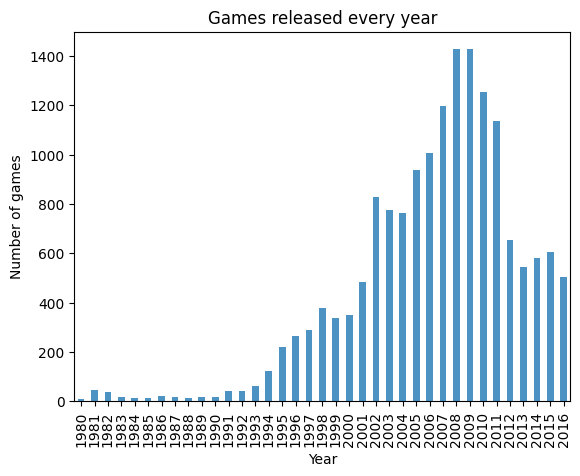

In [24]:
# Plot the count of games released each year
games.groupby(['year_of_release'])['name'].count().plot(kind='bar', alpha=0.8)
plt.ylabel('Number of games')
plt.xlabel('Year')
plt.title('Games released every year')
plt.show()

In [25]:
# Show the number of games released during the first decade
games_bp = games.groupby(['year_of_release', 'platform'])['total_sales'].count()
games_bp.head(10)

year_of_release  platform
1980             2600         9
1981             2600        46
1982             2600        36
1983             2600        11
                 NES          6
1984             2600         1
                 NES         13
1985             2600         1
                 DS           1
                 NES         11
Name: total_sales, dtype: int64

We first see a **relatively steady trend** from 1980 to 1990, of a few games released every year

Starting in 1991 we start seeing a **crescent** trend of many more games released every year. 
A trend that was roughly maintained until it reached a peak of about 1400 games released in 2008 and 2009.

Since then, we have seen a **decreasing** trend.<br>
We can correlate this last change in trend with the financial crisis of 2008, which may have provoked a shift in the market dynamic. 
With deeper research, we may find that big video game producers started to consolidate and displace smaller ones, and that the focus shifted from quantity to quality of games.

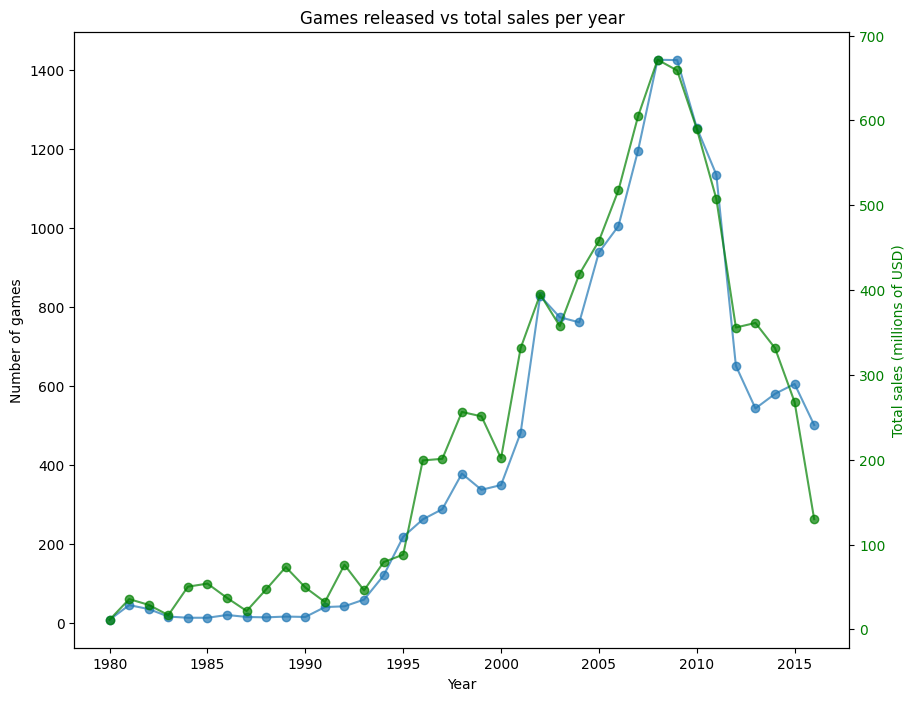

In [26]:
# Add a plot of the cumulative total sales by year to the previous plot

fig, ax1 = plt.subplots(figsize=(10, 8))

# First plot: number of games
games_per_year = games.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='line', ax=ax1, marker='o', alpha=0.7)

ax1.set_ylabel('Number of games')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y')

# Second plot: total sales
ax2 = ax1.twinx()

sales_per_year = games.groupby('year_of_release')['total_sales'].sum()
sales_per_year.plot(kind='line', ax=ax2, color='g', marker='o', alpha=0.7)

ax2.set_ylabel('Total sales (millions of USD)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Games released vs total sales per year')
plt.show()

#games.groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')

We see a very similar behaviour between the number of games released and the total sales per year.

The similarities are enough to consider the same 3 behavioural sections:
1. **1980 to 1990 - Low steady trend.** The sales have a bit more of an increasing trend. But we won't concern ourselves with this data going forward.
2. **1991 to 2008 - Crescent trend.** Minor differences in behaviour.
3. **2009- onward - Decreasing trend.** Few differences in behaviour but same trend.
We must also consider that the data of 2016 is most likely incomplete, as we were informed...





### Historical sales by platform

#### 
Let's get a general view of the total sales per platform per year..

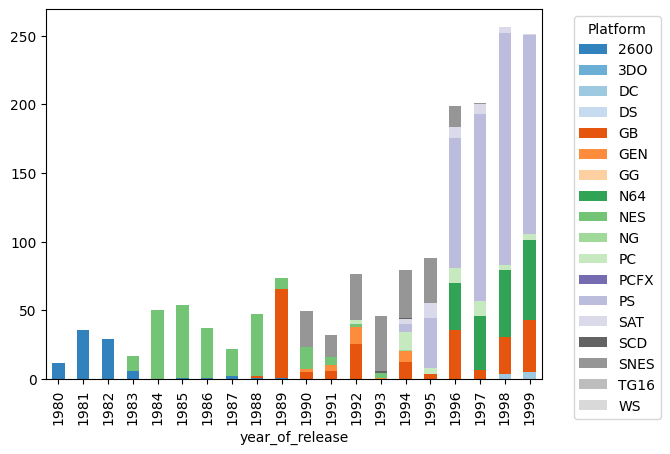

In [27]:
# Show a general view of the sales by platform in the first period
games[games['year_of_release']<2000].pivot_table(index='year_of_release', 
                  columns='platform', 
                  values='total_sales',
                  aggfunc='sum').plot(kind='bar', stacked=True, colormap='tab20c')
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


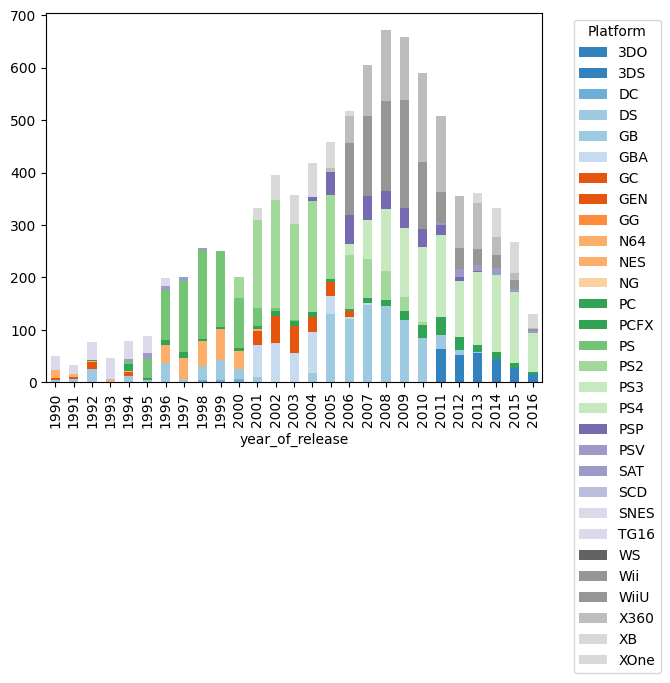

In [28]:
# Show a general view of the sales by platform in the second ant third periods

games[games['year_of_release']>=1990] \
    .pivot_table(index='year_of_release', 
                  columns='platform', 
                  values='total_sales',
                  aggfunc='sum') \
    .plot(kind='bar', stacked=True, colormap='tab20c')
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#### 
Now, let's select the top-selling platforms and see their behaviour over the years.

In [29]:
# Print the top sellers of all time in order
top_sales = (games.groupby('platform')['total_sales']
                .sum().sort_values(ascending=False))
top_sales = top_sales.head(13) # Define the number of platforms to consider
# Top 13-15 includes older platforms like GB, NES and N64
top_sales

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
Name: total_sales, dtype: float64

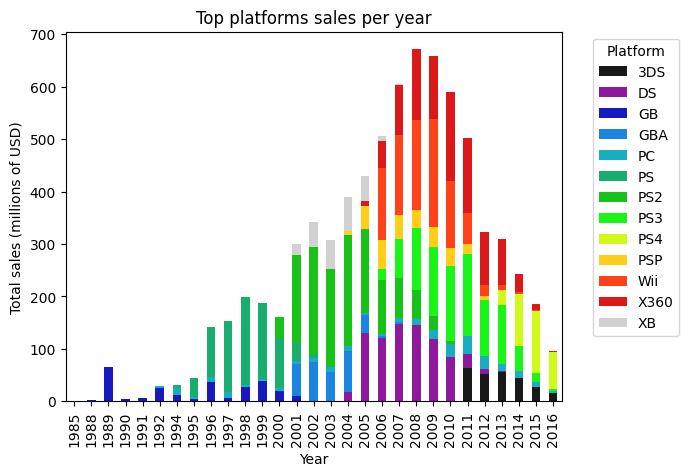

In [30]:
# Plot the total sales per year of the top sellers
pt = (
    games.query('platform in @top_sales.keys()')
        .pivot_table(
            index='year_of_release', 
            columns='platform', 
            values='total_sales',
            aggfunc='sum'
        )
)
pt.plot(kind='bar', stacked=True, alpha=0.9, colormap='nipy_spectral')
        
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Total sales (millions of USD)')
plt.xlabel('Year')
plt.title('Top platforms sales per year')

plt.show()



Here we can observe that all the top seller platforms are from one of three brands, except the PC.
Below is a review of the years during which each platform had considerable sales (visible in the above plot).

Play Station
- PS: 1994 - 2003  **- 10 years**
- PS2: 2000 - 2010 **- 11 years**
- PS3: 2006 - 2016 **- 11 years** (still has a small amount of sales in 2016, but might not keep it next year)
- PS4: 2014 - **ongoing - increasing** (should keep increasing its sales in 2017)
- PSP: 2004 - 2013 **- 10 years** (lower volume of sales than the PS's)

Nintendo
- GB: 1988 - 2001 **- 14 years**
- GBA: 2001 - 2007 **- 7 years**
- DS: 2004 - 2013 **- 10 years**
- 3DS: 2011 - **ongoing** (should still have considerable sales, but not for many years)
- Wii: 2006 - 2015 **- 10 years**

XBOX:
- XB: 2001 - 2006 **- 5 years**
- X360: 2005 - 2016 **- 12 years**(still has a small amount of sales in the "current" year)

PC: <br>
An exception among specialized videogame consoles, as games for PC have been present since at least 1992, although they don't share a very big part of the market.


These top-selling Platforms tend to have considerable sales for a period of about 10 years since their release and a maximum of 13 years for the game Boy (GB). Hence, it's reasonable to **consider at least 10 years of data back**.


We see, however, that most of these historical top-selling platforms have already ended their cycle and would not be good candidates to invest in for the next year. 
The only ones that still have at least a few promising years ahead of sales are the **PS4, the 3DS, and the PC** (for it's guarantee of longevity).


#### 
To better explore more promising platforms in the current year, let's look at the top selling platforms only over the last 5 years



In [31]:
# Print the top sellers since 2011
top_sales_recent = (games.query('year_of_release >= 2011')
                .groupby('platform')['total_sales']
                .sum().sort_values(ascending=False)) 
top_sales_recent = top_sales_recent.head(10) # Define the number of platforms to consider

top_sales_recent

platform
PS3     445.56
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
Name: total_sales, dtype: float64

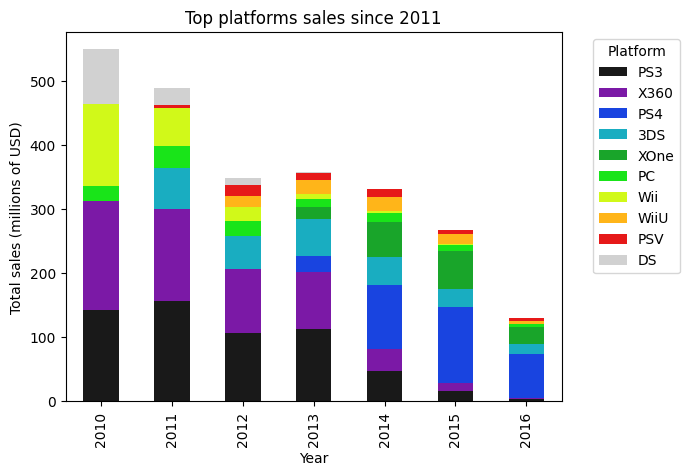

In [32]:
# Plot the total sales per year of the top sellers
pt = (
    games.query('platform in @top_sales_recent.keys() and year_of_release >= 2010')
        .pivot_table(
            index='year_of_release', 
            columns='platform', 
            values='total_sales',
            aggfunc='sum'
        ).reindex(columns=top_sales_recent.index.tolist())
)
pt.plot(kind='bar', alpha=0.9, stacked=True, colormap='nipy_spectral')
        
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Total sales (millions of USD)')
plt.xlabel('Year')
plt.title('Top platforms sales since 2011')

plt.show()



Based on this last graph we can construct the following:

#### Top 5 Promising Platforms for 2017

| Rank | Platform | 
|------|----------|
| 1    | PS4      | 
| 2    | 3DS      | 
| 3    | XOne     | 
| 4    | PC       | 
| 5    | WiiU     | 

We can advise to **focus our 2017 campaigns on games released for these platforms**. 

We neglected PS3, X360 and Wii, since they seem to be at the very end of their cycle currently.

We should also check for **new platforms** to be released, especially from the **3 big brands (PS, Nintendo and XBOX)**.

## 3.2 Delimitation of the data of interest

Based on our previous findings we will limit our data of interest to those games released for our top promising platforms, and sometimes consider other top sellers for completeness on pattern recognition. 

In [33]:
# Variables to use for filtering
selection = ['PS4', '3DS', 'XOne', 'PC', 'WiiU']
selection_p = top_sales_recent.keys()

In [34]:
games.query('platform in @selection_p').sort_values(by=['year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14470,Alter Ego,PC,1985,Simulation,0.00,0.03,0.00,0.01,59.0,5.8,T,0.04
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+,0.03
14610,Doom,PC,1992,Shooter,0.02,0.00,0.00,0.00,85.0,8.2,M,0.02
769,SimCity 2000,PC,1992,Simulation,1.20,0.84,0.00,0.10,NaN,NaN,NaN,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...
14207,Duke Nukem 3D: 20th Anniversary World Tour,PS4,2016,Shooter,0.03,0.00,0.00,0.01,77.0,6.9,M,0.04
4943,F1 2016 (Codemasters),PS4,2016,Racing,0.03,0.29,0.01,0.05,NaN,NaN,NaN,0.38
14222,Atelier Firis: The Alchemist of the Mysterious...,PS4,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
14046,Nobunaga's Ambition: Sphere of Influence - Sen...,PS3,2016,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04


## 3.3 Analysis

### Global platform sales distributions
Let's inspect the distributions of sales per game on every top-selling platform.

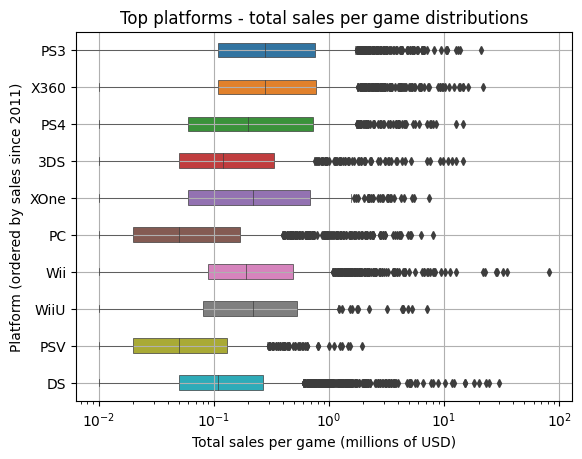

In [35]:
import seaborn as sns

#Plot a boxplot for all top-selling platforms in order
sns.boxplot(data=games.query("platform in @selection_p"), 
            x='total_sales', y='platform', 
            width=0.4, linewidth=0.5, fliersize=4, order=selection_p)
plt.grid(True)
plt.xscale('log')
plt.title('Top platforms - total sales per game distributions')
plt.xlabel('Total sales per game (millions of USD)')
plt.ylabel('Platform (ordered by sales since 2011)')
plt.show()
      

We notice a very prominent presence of outliers in these distributions. We can summarize this behaviour as:
- Sales are highly right-skewed: **many games sell little, but a few sell extremely well.**
- Platform success is generally driven by a few **blockbuster games** rather than consistent high sales across the catalog.
- The large number of extreme outliers suggests that the **means will be heavily influenced by a few top-selling games**, making it a less robust measure than the median.

### Reviews impact on a given platform

Let's review how the critics and users scores affect the sales of a game for a platform of choice.


In [36]:
# Select a platform of interest and filter the data
platform = 'PS3'
platform_sales = (games.query("platform == @platform")
                    .sort_values(by=['total_sales'], ascending=False)
                    [['name', 'total_sales', 'genre', 'user_score', 'critic_score']]
                 )
platform_sales

,name,total_sales,genre,user_score,critic_score
16,Grand Theft Auto V,21.05,Action,8.2,97.0
34,Call of Duty: Black Ops II,13.79,Shooter,5.3,83.0
37,Call of Duty: Modern Warfare 3,13.33,Shooter,3.2,88.0
41,Call of Duty: Black Ops,12.63,Shooter,6.4,88.0
54,Gran Turismo 5,10.70,Racing,7.5,84.0
...,...,...,...,...,...
16104,Nobunaga no Yabou Online: Houou no Shou,0.01,Strategy,NaN,NaN
15891,Rugby League Live 3,0.01,Action,NaN,NaN
15880,Turbo: Super Stunt Squad,0.01,Sports,NaN,38.0
16710,Samurai Warriors: Sanada Maru,0.01,Action,NaN,NaN


Now we have to deal with the fact that we still have empty values


In [37]:
platform_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 16 to 16676
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1305 non-null   object 
 1   total_sales   1305 non-null   float64
 2   genre         1305 non-null   object 
 3   user_score    860 non-null    float64
 4   critic_score  803 non-null    float64
dtypes: float64(3), object(2)
memory usage: 61.2+ KB


Before proceeding let's deal with the missing values in both `critic_score`and `user_score`.

We may follow 3 main courses of action: 

- Ignore the missing values, namely, ignore every data point with a missing value of interest. In which case, we will have less data to evaluate, and we may incorporate unknown biases.
- Use global statistical values like a mean, median or a constant for imputation.
- Use group-based imputation




#### Exploration of the critic and user review per genre on the platform

In [38]:
# Explore the amount of missing reviews by genre 
genre_means = (
    platform_sales
    .groupby('genre')
    .agg(
        games_released=('name', 'count'),
        avg_missing_critics=('critic_score', lambda x: x.isnull().sum()/len(x)*100), # percentage of missing values
        avg_missing_users=('user_score', lambda x: x.isnull().sum()/len(x)*100), # percentage of missing values
        avg_critic_score=('critic_score', 'mean'),
        avg_user_score=('user_score', 'mean'),
        total_sales=('total_sales', 'sum')
    )
)
genre_means.sort_values(by=['avg_missing_critics'], ascending=False)

,games_released,avg_missing_critics,avg_missing_users,avg_critic_score,avg_user_score,total_sales
genre,,,,,,
Adventure,72,72.222222,65.277778,68.300000,6.756000,22.28
Strategy,22,63.636364,63.636364,73.375000,6.687500,4.68
Misc,122,60.655738,63.114754,72.166667,6.524444,44.93
Puzzle,2,50.000000,50.000000,74.000000,8.100000,0.44
Sports,210,40.476190,34.285714,73.304000,6.165942,133.14
Platform,36,38.888889,27.777778,69.727273,6.807692,29.32
Action,373,36.997319,30.831099,69.012766,6.901550,297.87
Role-Playing,117,33.333333,29.059829,70.551282,7.215663,73.65
Simulation,30,33.333333,40.000000,62.800000,6.583333,10.31


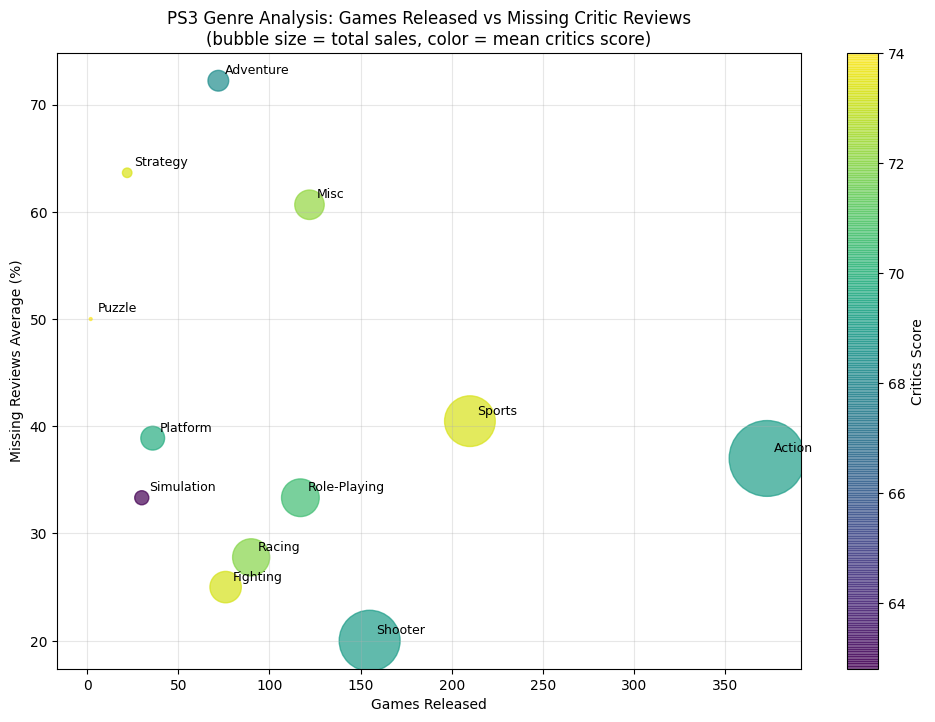

In [39]:
plt.figure(figsize=(12, 8))

# Create bubble plot
plt.scatter(x=genre_means['games_released'], 
           y=genre_means['avg_missing_critics'],
           s=genre_means['total_sales']*10,  # bubble size based on total_sales
           alpha=0.7, 
           c=genre_means['avg_critic_score'], 
           cmap='viridis')

# Add genre labels
for genre in genre_means.index:
    plt.annotate(genre, 
                (genre_means.loc[genre, 'games_released'], 
                 genre_means.loc[genre, 'avg_missing_critics']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9)

plt.xlabel('Games Released')
plt.ylabel('Missing Reviews Average (%)')
plt.title(f'{platform} Genre Analysis: Games Released vs Missing Critic Reviews\n(bubble size = total sales, color = mean critics score)')
plt.grid(True, alpha=0.3)
plt.colorbar(label='Critics Score')  # Add colorbar for critic score
plt.show()

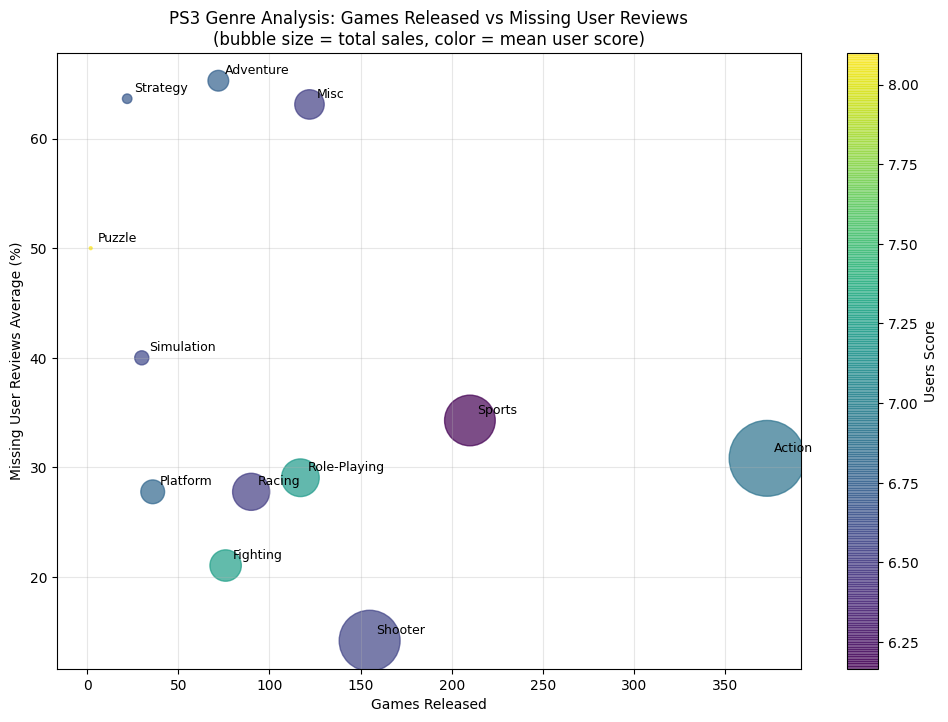

In [40]:
plt.figure(figsize=(12, 8))

# Create bubble plot
plt.scatter(x=genre_means['games_released'], 
           y=genre_means['avg_missing_users'],
           s=genre_means['total_sales']*10,  # bubble size based on mean score
           alpha=0.7, 
           c=genre_means['avg_user_score'],  
           cmap='viridis')

# Add genre labels
for genre in genre_means.index:
    plt.annotate(genre, 
                (genre_means.loc[genre, 'games_released'], 
                 genre_means.loc[genre, 'avg_missing_users']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9)

plt.xlabel('Games Released')
plt.ylabel('Missing User Reviews Average (%)')
plt.title(f'{platform} Genre Analysis: Games Released vs Missing User Reviews\n(bubble size = total sales, color = mean user score)')
plt.grid(True, alpha=0.3)
plt.colorbar(label='Users Score')  # Add colorbar for user score
plt.show()

In [41]:
genre_means.describe()

,games_released,avg_missing_critics,avg_missing_users,avg_critic_score,avg_user_score,total_sales
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,108.750000,41.860097,38.917273,70.622746,6.838094,77.610833
std,102.537022,16.392455,17.524057,3.164564,0.499490,89.326659
min,2.000000,20.000000,14.193548,62.800000,6.165942,0.440000
25%,34.500000,31.944444,27.777778,69.005542,6.547840,19.287500
50%,83.000000,37.943104,32.558407,71.252564,6.721750,48.020000
75%,130.250000,52.663934,53.278689,73.299684,6.980078,88.522500
max,373.000000,72.222222,65.277778,74.000000,8.100000,297.870000


We see that for PS3, although the number of games released by genre, as well as the proportion of **missing critic scores** (20% - 72%) and **missing user scores** (14% - 65%), can have considerable variations, the average `critic_score`(62 - 74) and `user_score` (6.1 - 8.1) don't variate as much.

Also, we can see that the **average scores by genre** for both users an do not seem to correlate with the **sales by genre**.

These observations provide us with a foundation to opt for **filling the missing data with segmented means by genre**.

In [42]:
# Fill the missing (critic and user scores) values with mean values segmented by genre
platform_sales['critic_score_genre_filled'] = (
    platform_sales['critic_score']
    .fillna(
        platform_sales['genre'].map(genre_means['avg_critic_score'])
    )
)

platform_sales['user_score_genre_filled'] = (
    platform_sales['user_score']
    .fillna(
        platform_sales['genre'].map(genre_means['avg_user_score'])
    )
)

platform_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 16 to 16676
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       1305 non-null   object 
 1   total_sales                1305 non-null   float64
 2   genre                      1305 non-null   object 
 3   user_score                 860 non-null    float64
 4   critic_score               803 non-null    float64
 5   critic_score_genre_filled  1305 non-null   float64
 6   user_score_genre_filled    1305 non-null   float64
dtypes: float64(5), object(2)
memory usage: 113.9+ KB


#### `critic_score`impact

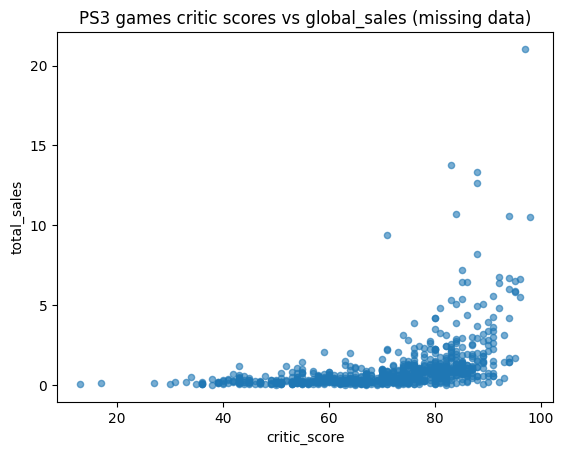

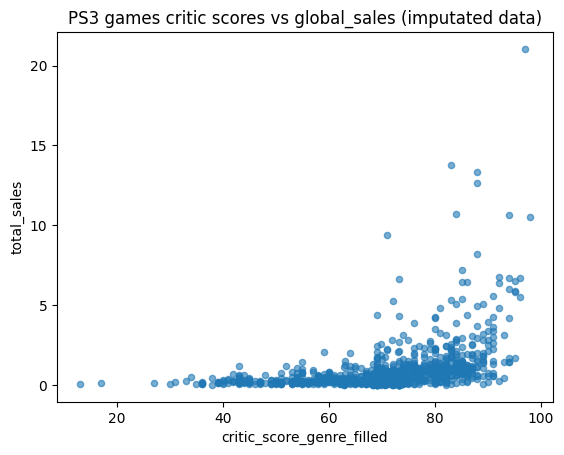

,critic_score,critic_score_genre_filled,total_sales
critic_score,1.000000,1.000000,0.433712
critic_score_genre_filled,1.000000,1.000000,0.401998
total_sales,0.433712,0.401998,1.000000


In [43]:

df_critics = platform_sales[['critic_score', 'critic_score_genre_filled', 'total_sales']]

df_critics.dropna().plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.6
)
plt.title(f'{platform} games critic scores vs global_sales (missing data)')
plt.show()

df_critics.plot(
    x='critic_score_genre_filled',
    y='total_sales',
    kind='scatter',
    alpha=0.6
)
plt.title(f'{platform} games critic scores vs global_sales (imputated data)')

plt.show()



df_critics.corr()

#### `user_score`

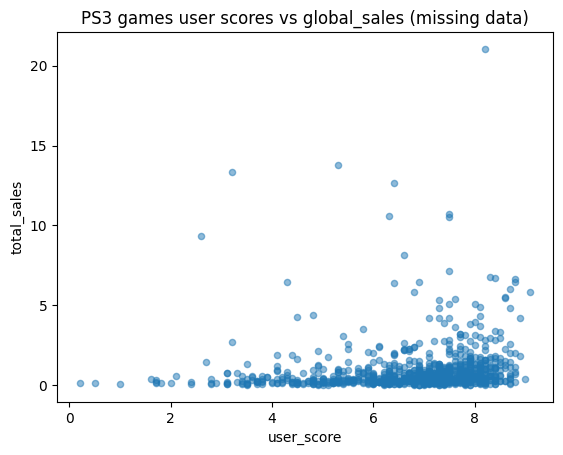

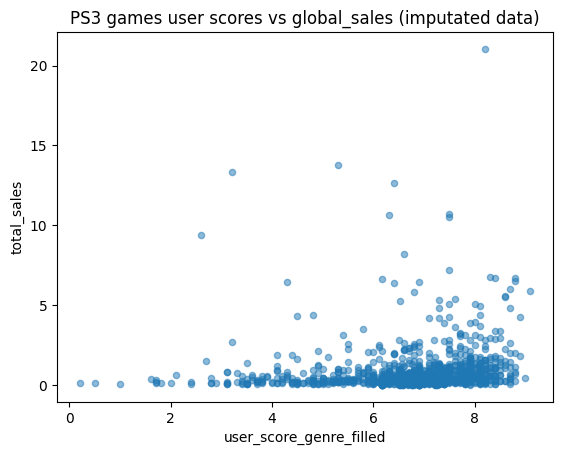

,user_score,user_score_genre_filled,total_sales
user_score,1.000000,1.000000,0.127926
user_score_genre_filled,1.000000,1.000000,0.121408
total_sales,0.127926,0.121408,1.000000


In [44]:
df_users = platform_sales[['user_score', 'user_score_genre_filled', 'total_sales']]

df_users.dropna().plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.5
)
plt.title(f'{platform} games user scores vs global_sales (missing data)')
plt.show()

df_users.plot(
    x='user_score_genre_filled',
    y='total_sales',
    kind='scatter',
    alpha=0.5
)
plt.title(f'{platform} games user scores vs global_sales (imputated data)')

plt.show()


df_users.corr()

In [45]:
df_users.describe()

,user_score,user_score_genre_filled,total_sales
count,860.000000,1305.000000,1305.000000
mean,6.720930,6.708519,0.713663
std,1.463559,1.202480,1.403467
min,0.200000,0.200000,0.000000
25%,6.000000,6.300000,0.110000
50%,7.100000,6.900000,0.280000
75%,7.800000,7.400000,0.760000
max,9.100000,9.100000,21.050000


For the critics score we see a **weak positive correlation** and for the users score we see a **very weak positive correlation**.

After dealing with null values via a genre mean imputation, we don't see much difference in the correlation coefficients, which reflects a good management of the missing values.

We can conclude that the critic scores may have more of an impact on the sales of a PS3 game than the user reviews. However, **neither of the reviews seems to be a determining factor for a game to be a hit**.

### Sales by genre


In [58]:
df_genres = (
    games.query('platform in @selection')
        .groupby(['genre'])['total_sales'].agg(['count', 'sum'])
        .sort_values(by='sum', ascending=False)
)
df_genres

,count,sum
genre,,
Action,646,241.03
Shooter,242,200.02
Role-Playing,262,173.88
Sports,167,103.63
Simulation,160,81.59
Platform,73,63.14
Strategy,212,50.07
Racing,110,48.45
Misc,137,47.47


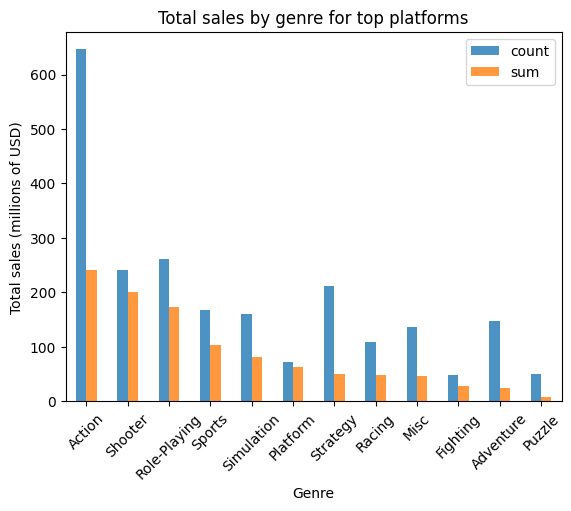

In [59]:
# Plot the count of games released each year
df_genres.plot(kind='bar', rot=45, alpha=0.8)
plt.ylabel('Total sales (millions of USD)')
plt.xlabel('Genre')
plt.title('Total sales by genre for top platforms')
plt.show()

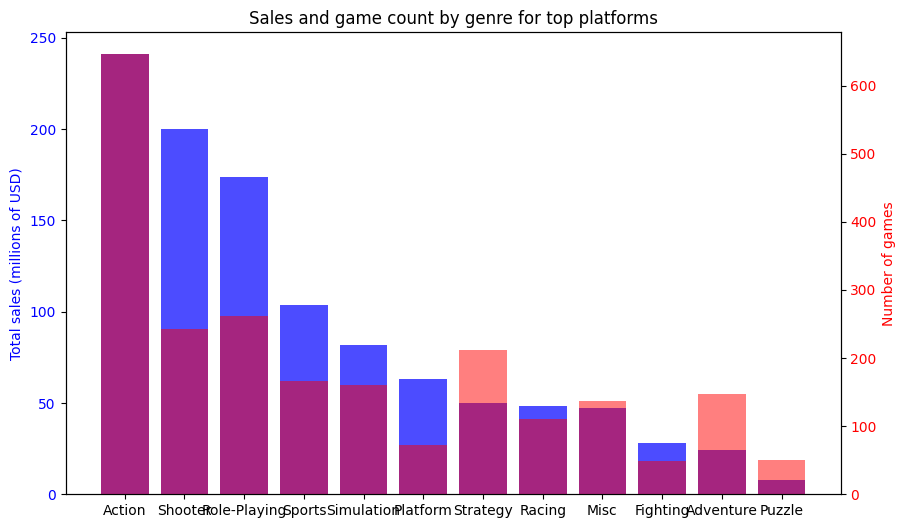

In [61]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primer eje: ventas
ax1.bar(df_genres.index, df_genres['sum'], alpha=0.7, color='blue')
ax1.set_ylabel('Total sales (millions of USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Segundo eje: count
ax2 = ax1.twinx()
ax2.bar(df_genres.index, df_genres['count'], alpha=0.5, color='red')
ax2.set_ylabel('Number of games', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Sales and game count by genre for top platforms')
plt.xticks(rotation=45)
plt.show()

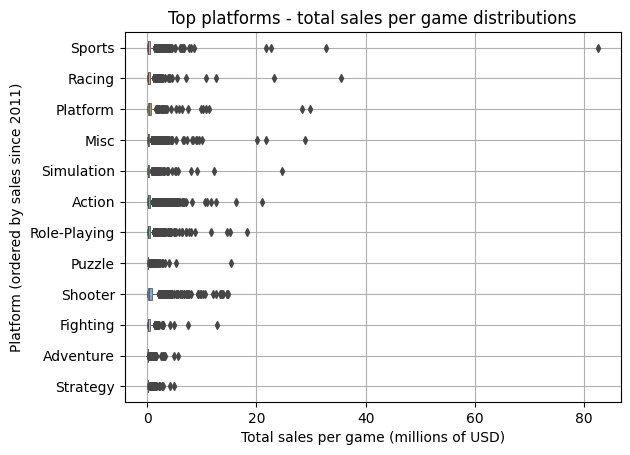

In [60]:
#Plot a boxplot for all top-selling platforms in orde
sns.boxplot(data=games.query("platform in @selection_p"), 
            x='total_sales', y='genre', 
            width=0.4, linewidth=0.5, fliersize=4)#, order=df_genres.keys())
plt.grid(True)
#plt.xscale('log')
plt.title('Top platforms - total sales per game distributions')
plt.xlabel('Total sales per game (millions of USD)')
plt.ylabel('Platform (ordered by sales since 2011)')
plt.show()


Con un vistazo rápido a las distribuciones vemos que no se puede generalizar porque dominan los outlliers

## 4. User Profiles

- Identify the top 5 platforms (using the same procedure as beofre for global sales).
- The top 5 genres
- Determine if the ESRB affect regional sales

### NA

In [ ]:
top_platforms_df = pd.DataFrame()


In [ ]:
#Get the main 5 platforms over the last 5-years
top_platforms_na = (games.query('year_of_release >= 2011')
                .groupby('platform')['na_sales']
                .sum().sort_values(ascending=False)) 
top_platforms_na = top_platforms_na.head(10) # Define the number of platforms to consider

top_platforms_na


In [ ]:
#Get the main 5 genres over the last 5-years
top_genres_na = (games.query('year_of_release >= 2011')
                .groupby('genre')['na_sales']
                .sum().sort_values(ascending=False)) 
top_genres_na = top_genres_na.head(10) # Define the number of platforms to consider

top_genres_na

### EU

In [ ]:
#Get the main 5 platforms over the last 5-years
top_platforms_eu = (games.query('year_of_release >= 2011')
                .groupby('platform')['eu_sales']
                .sum().sort_values(ascending=False)) 
top_platforms_eu = top_platforms_eu.head(10) # Define the number of platforms to consider

top_platforms_eu


In [ ]:
#Get the main 5 genres over the last 5-years
top_genres_eu = (games.query('year_of_release >= 2011')
                .groupby('genre')['na_sales']
                .sum().sort_values(ascending=False)) 
top_genres_eu = top_genres_eu.head(10) # Define the number of platforms to consider

top_genres_eu

### JP

In [ ]:
#Get the main 5 platforms over the last 5-years
top_platforms_jp = (games.query('year_of_release >= 2011')
                .groupby('platform')['jp_sales']
                .sum().sort_values(ascending=False)) 
top_platforms_jp = top_platforms_jp.head(10) # Define the number of platforms to consider

top_platforms_jp


We see certain variations over different regions:

-

## 5. Hypothesis testing


## 6. Conclusions

In [ ]:
Buscar patrones de consumo